# 2016 Election Results Simulation and Visualization

### Emulating 538's final forecast for the 2016 presidential election

This notebook presents a visualization of the likelihood of popular vote outcomes for each candidate in the 2016 presidential election. The graph shows the results of 20,000 simulations, with each bar representing the percent of simulations that had a certain candidate win by a particular margin of victory (shown on the x-axis). It emulates 538's final forecast model, available here: https://fivethirtyeight.com/features/the-media-has-a-probability-problem/. This project was part of an assignment given by Professor Paul Ginsparg for Cornell University's INFO 2950: Intro to Data Science, which is a class that I took in the Spring 2018 semester.

## Dependencies
- matplotlib.pyplot
- collections library (most importantly defaultdict)
- SciPy library (most importantly scipy.stats.norm)
- NumPy library

## Citations
- The results2016 data set as well as some of the implementation was provided by Prof. Ginsparg as part of the teaching

In [65]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.misc import comb
from collections import Counter
import numpy as np
from scipy.misc import factorial
rand = np.random.rand
from scipy.stats import poisson
def normal(x,mu=0.54,sigma=.04):
    return np.exp(-(x-mu)**2/(2.*sigma**2))/(sigma*np.sqrt(2.*np.pi))

In [7]:
# Returns a dictionary {String:Int} with a simulated election result by # of electoral votes won [int] 
# by each candidate [String].
# Used as a helper for candidateCounts()
# Precondition: randNum is not null
def candidateCountsDict(randNum):
    result = defaultdict(int)
    bias = randNum
    for state in mean_std:
        temp_result = norm.rvs(mean_std[state][0], mean_std[state][1]) + bias
        if "Nebraska" in state:
            state = "Nebraska"
        if "Maine" in state:
            state = "Maine"
        if temp_result < 0.5:
            result['Clinton'] += results2016[state]["electoral_votes"]
        if temp_result > 0.5:
            result['Trump'] += results2016[state]["electoral_votes"]
    return result

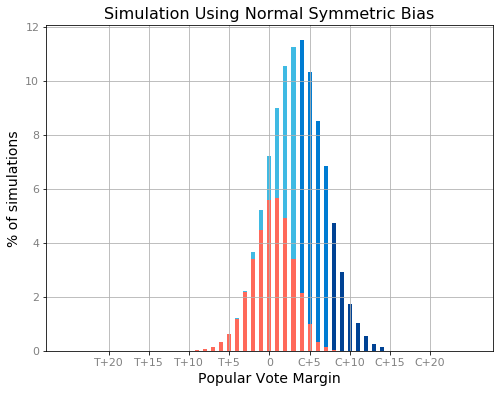

In [67]:
from election_data import mean_std, results2016
from collections import defaultdict

population = 0
for state in results2016:
    population += results2016[state]['vote_total']

tmargins = defaultdict(int)
cmargins = defaultdict(int)

# Returns a dictionary of potential margins of victory for both candidates, to be used in the visualization
# Uses helper candidateCountsDict to get a dictionary of potential results by # of electoral votes 
# for both candidates.
def candidateCounts():
    votes = []
    margin = []
    TrumpPV = 0 
    ClintonPV = 0
    bias = norm.rvs(0,.016)
    for state in mean_std:
        draw = norm.rvs(mean_std[state][0], mean_std[state][1]) + bias
        if "Nebraska" in state:
            state = "Nebraska"
        if "Maine" in state:
            state = "Maine"
        ClintonPV += draw * results2016[state]['vote_total']
        TrumpPV += results2016[state]['vote_total']*(1-draw)
    
    #Percentage of popular vote won by Clinton and Trump in each trial
    c_percentage = (ClintonPV/population) * 100
    t_percentage = (TrumpPV/population) * 100
    
    #Calculating how many times a margin appears in 20000 trials
    electoral_result = candidateCountsDict(bias)
    percentage = round(t_percentage-c_percentage)
    if electoral_result['Trump'] > 270:
        tmargins[percentage] += 1
        return tmargins
    if electoral_result['Clinton'] > 270:
        cmargins[percentage] += 1 
        return cmargins

#Calling candidateCounts for 20000 trials
for i in range(20000):
    candidateCounts()

xCoordinatesClinton = range(-25, 26)
xCoordinatesTrump = range(-25, 26)

yCoordinatesClinton = []
yCoordinatesTrump = []
for i in range(-25, 26):
    yCoordinatesTrump.append((tmargins[i]/20000)*100)
    yCoordinatesClinton.append((cmargins[i]/20000)*100)
    
    
colors = 29*['#3FBAE3']+4*['#007CD2']+10*['#004294'] # from Prof. Ginsparg's solution

plt.figure(figsize=(8,6))
barWidth = 0.5
plt.bar(xCoordinatesTrump, yCoordinatesTrump, width=barWidth, color='#FF695A', label='trump');
plt.bar(xCoordinatesClinton, yCoordinatesClinton, bottom=yCoordinatesTrump, width=barWidth, color=colors, label='clinton');
plt.title("Simulation Using Normal Symmetric Bias", size=16);
plt.ylabel('% of simulations', size=14);
plt.xlabel('Popular Vote Margin', size=14);
plt.xticks(range(-20,21,5),['T+20','T+15','T+10','T+5','0','C+5','C+10','C+15','C+20'],fontsize=11,color='grey')
plt.yticks(fontsize=11,color='grey')
plt.grid();